## Pandas에서 그래프 그리기

지금껏 살펴본 matplotlib은 꽤 저수준의 도구이다. 

데이터를 보여줄 다양한 형태와 범례 제목, 눈금 이름과 같은 주석을 조합해서 그래프를 만들어야 한다.

Pandas에는 로우이름, 칼럼이름 그리고 가능한 경우에는 그룹 정보도 담고 있는데, 

이말은 pandas를 이용하면, 다양한 종류의 온전한 그래프를 그리기 위해 필요한 많은 양의 matplotlib코드를 한두줄 의 간단한 문장으로 표현 가능.



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 8.2.1 선그래프

Series와 DataFrame 은 둘다 plot이라는 메소드를 이용해서 다양한 형태의 그래프를 생성할 수 있다. 

기본적으로 plot 메소드는 선 그래프를 생성한다.


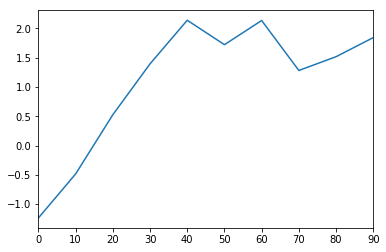

In [2]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

s.plot()

Series 객체의 색인은 matplotlib 에서 그래프를 생성할 때, X축으로 해석되며,  use_index = False 옵션으로 색인을 그래프의 축으로 사용하는것을 막을 수 있다. 

X축의 눈금과 한께는 xticks와 xlim을 통해서 조절 가능.

Y축도 역시 yticks 와 ylim을 통해서 조절 가능.

대부분의 pandas 그래프 메소드는 부수적으로 ax 인자를 받는데, 이 인자는 matplotlib에서 서브플롯 객체가 될 수 있다. 

일단, 예제를 하나 보자. 

In [0]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))

In [4]:
df

,A,B,C,D
0,-1.027456,-0.817050,-1.151155,2.036019
10,-0.554404,-0.913873,-1.512610,2.421698
20,-0.533961,0.428251,0.700468,1.090717
30,-1.128054,2.694347,0.111142,-0.586087
40,0.088783,3.167724,0.450279,-1.230689
50,-0.455216,3.284810,0.489626,-1.740847
60,-1.858459,2.944610,0.369237,-0.141870
70,-0.570387,3.083225,-1.447717,0.150728
80,-0.715254,3.938144,-2.723319,0.486056
90,-0.363789,4.124825,-1.937368,-0.679063


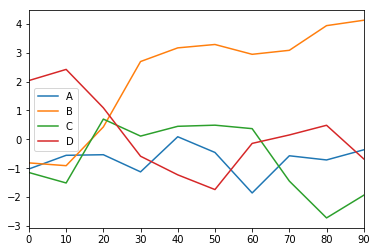

In [5]:
df.plot()

Series.plot() 인자

* label: 그래프의 범례 이름
* ax: 그래프를 그릴 matplotlib의 서브 플롯 객체, 만약 아무것도 넘어오지 않은면, 현재 활성화되어 있는 matplotlib의 서브플롯을 사용.
* style: matplotlib에 전달한 'ko--'와 같은 스타일의 문자열
* alpha: 투명도 (0~1)
* kind: 그래프 종류, line, bar, barh, kde 
* logy: y축에 대한 log 스케일
* use_index: 객체의 색인을 눈금 이름으로 사용할 지 여부
* rot: 눈금이름을 rotation (0부터 360)
* xticks: X축으로 사용할 값
* yticks: Y축으로 사용할 값
* xlim: X축 한계
* ylim: Y축 한계
* grid: 축의 그리드를 표시할 지 여부. 

DataFrame에는 칼럼을 쉽게 다루기 위해 몇가지 옵션을 제공한다. 아래 참고.

* subplots: 각 DataFrame의 칼럼을 독립된 서브플롯에 그린다.
* sharex: subplots=True 이면같은 x축을 공유하고 눈금과 한계를 연결
* sharey: subplots=True이면, 같은 Y축을 공유.
* figsize: 그래프의 크리를 튜플로 지정.
* title: 그래프 제목
* legend: 서브플롯의 범례를 추가.
* sort_columns: 칼럼을 알파벳 순서로 그린다. 

---

이젠 예제를 보면서 더 깊이 알아보자.

### 8.2.2 막대 그래프

선 그래프 대신 막대 그래프를 보고 싶으면, kind='bar' 혹은 kind='barh'를 넘기면 됨.

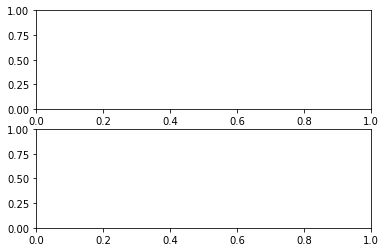

In [6]:
fig, axes = plt.subplots(2, 1)

In [0]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [8]:
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)

In [9]:
data.plot(kind='barh', ax=axes[1], color='g', alpha=0.7)

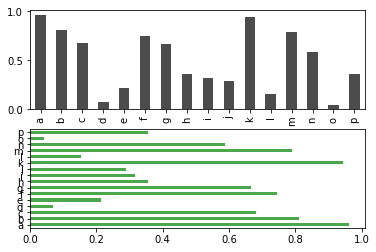

In [10]:
fig

DataFrame에서 막대 그래프는 각 로우의 값을 함께 묶어서 하나의 그룹마다 각각의 막대를 보여준다. 

뭔말?

In [0]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [12]:
df

Genus,A,B,C,D
one,0.413288,0.104166,0.406988,0.849285
two,0.465713,0.794926,0.317719,0.888418
three,0.291574,0.597629,0.460206,0.196964
four,0.321652,0.270386,0.576994,0.181297
five,0.444346,0.110851,0.843419,0.815502
six,0.275415,0.359836,0.809632,0.126146


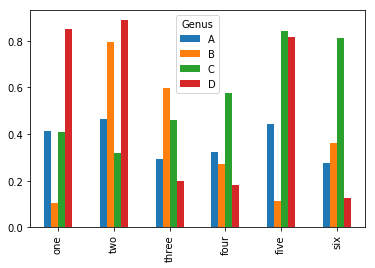

In [13]:
df.plot(kind='bar')

DataFrame의 칼럼인 'Genus'가 범례의 제목으로 사용되었고, 쌓인 막대그래프는 stacked= True 옵션을 사용해서 생성 가능. 각 로우의 값이 하나의 막대에 쌓여져 출력.

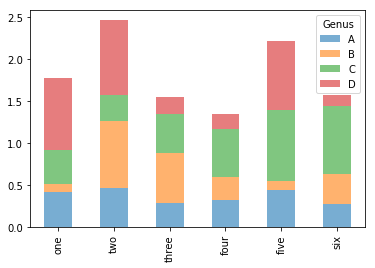

In [14]:
df.plot(kind='bar', stacked=True, alpha=0.6)

In [15]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tips.csv to tips.csv
User uploaded file "tips.csv" with length 7943 bytes


In [0]:
tips = pd.read_csv('tips.csv')

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [24]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [25]:
# 혼자거나 6명 규모의 파티는 제외

party_counts = party_counts.ix[:, 2:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [26]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [27]:
# deprecated 라고 하니, 그럼 바뀐것으로 한번 테스트

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [0]:
# 각 로우의 값이 1이 되도록 정규화.

party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)

In [29]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


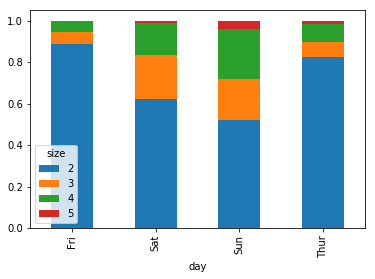

In [30]:
party_pcts.plot(kind='bar', stacked=True)

위의 그래프로부터 파티 규모는 주말에 커지는 경향이 있음을 알 수 있다. 

### 8.2.3 히스토그램과 밀도 그래프

히스트그램은 막대 그래프의 일종, 값의 빈도를 분리해서 보여줌.

앞에서 사용한 팁 데이터를 이용해서 전체 결제 금액 대비 팁의 비율을 Series의 hist 메소드를 이용해서 그려보자.

In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


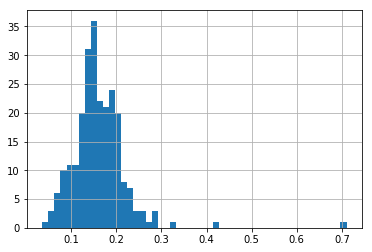

In [35]:
tips['tip_pct'].hist(bins=50)

이와 관련있는 다른 도표로 밀도 그래프가 있는데, 밀도 그래프는 관찰 값을 사용해서 추정되는 연속된 확률 분포를 나타낸다. 

일반적으로 kernels메소드를 잘 섞어서 이 분포를 근사하는 식으로 그리는데, 이 것은 좀 더 단순한 정규 분표이다. 

그래서 밀도 그래프는 KDB(Kernel Density Estimate), 커널 밀도 추정 그래프라고도 알려져 있다.


plot 메소드의 인자로 kind='kde'를 넘기면 밀도 그래프를 표준 KDE형식으로 생성.

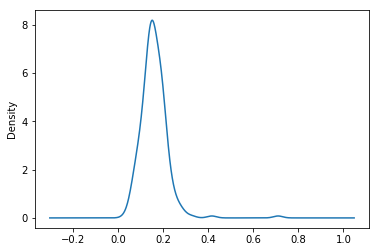

In [36]:
tips['tip_pct'].plot(kind='kde')

히스토그램과 밀도 그래프는 함께 자주 사용되는데, 정규화된 히스토그램 위에 커널 밀도 추정 그래프를 함께 그린다. 

예를 들어 2개의 다른 표준 정규분포로 이루어진 양봉 분포를 생각해보자. 

In [0]:
comp1 = np.random.normal(0, 1, size=200)

comp2 = np.random.normal(10, 2, size=200)

In [0]:
values = pd.Series(np.concatenate([comp1, comp2]))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


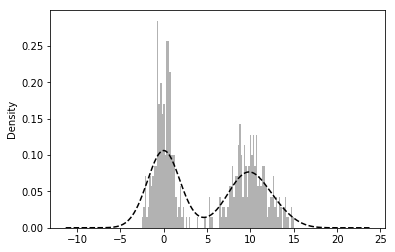

In [42]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### 8.2.4 산포도

산포도는 2개의 1차원 데이터 묶음 간의 관계를 나타내고자 할 때 사용.

In [43]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving macrodata.csv to macrodata.csv
User uploaded file "macrodata.csv" with length 18242 bytes


In [0]:
macro = pd.read_csv('macrodata.csv')

In [45]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [0]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [0]:
trans_data = np.log(data).diff().dropna()

In [48]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


간단한 산포도는 plt.scatter 메소드를 이용해서 그릴수 있음.

Text(0.5, 1.0, 'Changes in log m1 vs. log unemp')

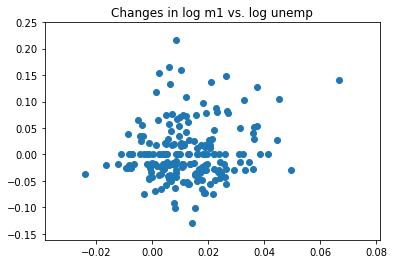

In [51]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

탐색 데이터분석에서는 변수의 그룹 간 모든 산포도를 살펴보는 일이 매우 유용한데, 

이는 짝지은 그래프 또는 산포도 행렬이라고 부른다. 

pandas에서는 scatter_matrix함수가 있어서 산포도 행렬을 간단하게 그릴 수 있음.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fb78e35c0>,
      dtype=object)

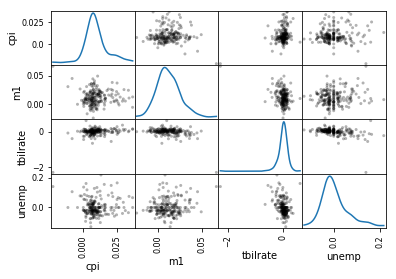

In [53]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)